# Author
David Dada  

## Gradient descent algorithm 
\begin{equation}
\theta^{+} = \theta^{-} + \frac{\alpha}{m} (y_{i} - h(x_{i}) )\bar{x}
\end{equation}

This minimizes the following cost function

\begin{equation}
J(x, \theta, y) = \frac{1}{2m}\sum_{i=1}^{m}(h(x_i) - y_i)^2
\end{equation}

where
\begin{equation}
h(x_i) = \theta^T \bar{x}
\end{equation}

In [1]:
# Imports
import numpy as np
import random
import math
from matplotlib import pyplot as plt
np.set_printoptions(formatter={'float_kind':lambda x: "%2.1f" %x})

In [4]:
# Generate Data Samples
true_slope = 15
true_intercept = 2.4
input_var = np.arange(0.0,100.0)
output_var = true_slope * input_var + true_intercept + 300.0 * np.random.rand(len(input_var))

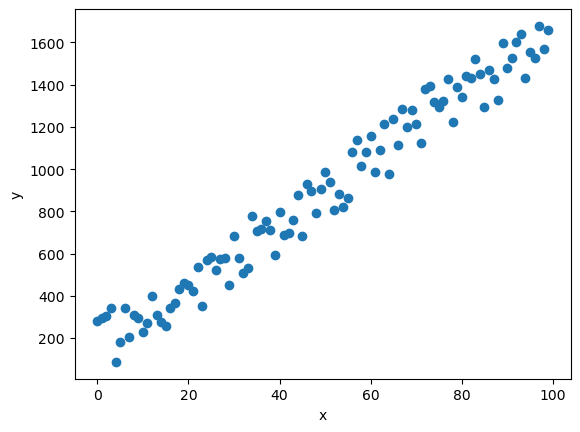

In [5]:
# Do not change the code in this cell
plt.figure()
plt.scatter(input_var, output_var)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [10]:
def compute_cost(ip, op, params):
    """
    Cost function in linear regression where the cost is calculated
    ip: input variables
    op: output variables
    params: corresponding parameters
    Returns cost
    """
    num_samples = len(ip)
    cost_sum = 0.0
    for x,y in zip(ip, op):
        """"
        1. Take 1 x and 1 y from input/output
        2. dot product weight vector  w = [w0, w1] with x vector [x0, x1] where x0 = 1 always
        3. w0x0 + w1x1, w0 + w1x1
        """
        y_hat = np.dot(params, np.array([1.0, x]))
        cost_sum += (y_hat - y) ** 2
    
    cost = cost_sum / (num_samples)
    
    return cost

### Linear Regression using Batch Gradient Descent from scratch


### Batch gradient descent
Algorithm can be given as follows:

```for j in 0 -> max_iteration: 
    for i in 0 -> m: 
        theta += (alpha / m) * (y[i] - h(x[i])) * x_bar
```

In [11]:
def linear_regression_using_batch_gradient_descent(ip, op, params, alpha, max_iter):
    """
    Compute the params for linear regression using batch gradient descent
    ip: input variables
    op: output variables
    params: corresponding parameters
    alpha: learning rate
    max_iter: maximum number of iterations
    Returns parameters, cost, params_store
    """
    # initialize iteration, number of samples, cost and parameter array
    iteration = 0
    num_samples = len(ip)
    cost = np.zeros(max_iter)
    params_store = np.zeros([2, max_iter+1]) # 2d array of w for each iteration
    params_store[:, 0] = params
    
    # Compute the cost and store the params for the corresponding cost
    while iteration < max_iter:
        cost[iteration] = compute_cost(ip, op, params_store[:, iteration])
        w = params_store[:, iteration]
        
        print('--------------------------')
        print(f'iteration: {iteration}')
        print(f'cost: {cost[iteration]}')
        
        # Apply batch gradient descent
        gradient = 0

        for i in range(num_samples):
            y = op[i]
            x = np.array([1.0, ip[i]])
            y_hat = np.dot(w, x)
            gradient += (y_hat - y) * x
        
        # new gradient W_new = W_old - alpha/m * partial_derivative_wrt_J
        params_store[:, iteration + 1] = w - ((alpha/num_samples) * gradient)
        
        iteration += 1
    
    return params, cost, params_store

In [14]:
# Training the model
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(input_var, output_var, test_size=0.20)

params_0 = np.array([20.0, 80.0])
alpha_batch = 1e-4
max_iter = 20
params_hat_batch, cost_batch, params_store_batch =\
   linear_regression_using_batch_gradient_descent(x_train, y_train, params_0, alpha_batch, max_iter)

[21.0 2.0 64.0 8.0 13.0 61.0 69.0 9.0 90.0 78.0 26.0 53.0 17.0 14.0 98.0
 91.0 99.0 11.0 37.0 52.0 83.0 63.0 15.0 27.0 42.0 22.0 87.0 65.0 73.0
 56.0 58.0 28.0 36.0 76.0 94.0 18.0 50.0 74.0 19.0 67.0 96.0 75.0 84.0
 34.0 44.0 93.0 81.0 62.0 59.0 16.0 55.0 45.0 89.0 32.0 80.0 71.0 10.0
 38.0 88.0 4.0 68.0 6.0 95.0 60.0 92.0 77.0 1.0 79.0 41.0 33.0 86.0 47.0
 24.0 54.0 82.0 97.0 72.0 25.0 3.0 0.0]
--------------------------
iteration: 0
cost: 14436472.46209437
--------------------------
iteration: 1
cost: 5891764.571014683
--------------------------
iteration: 2
cost: 2408429.2395159714
--------------------------
iteration: 3
cost: 988412.8091769299
--------------------------
iteration: 4
cost: 409528.8656848903
--------------------------
iteration: 5
cost: 173540.95248590072
--------------------------
iteration: 6
cost: 77338.01898049652
--------------------------
iteration: 7
cost: 38119.8237713453
--------------------------
iteration: 8
cost: 22132.02431912211
------------------------

### Stochastic Gradient Descent from scratch.

### Stochastic Gradient Descent
Algorithm can be given as follows:
```shuffle(x, y)
for i in 0 -> m:
    theta += (alpha / m) * (y[i] - h(x[i])) * x_bar  
```

In [79]:
def lin_reg_stoch_gradient_descent(ip, op, params, alpha):
    """
    Compute the params for linear regression using stochastic gradient descent
    ip: input variables
    op: output variables
    params: corresponding parameters
    alpha: learning rate
    Returns parameters, cost, params_store
    """
    max_iter = 20
    stochastic_batch_size = 3 # will be sampling n random samples, where n = this batch size
    
    # initialize iteration, number of samples, cost and parameter array
    iteration = 0
    num_samples = len(ip)
    cost = np.zeros(max_iter)
    params_store = np.zeros([2, max_iter+1]) # 2d array of w for each iteration
    
    # set first w
    params_store[:, 0] = params
    
    # Compute the cost and store the params for the corresponding cost
    while iteration < max_iter:
        cost[iteration] = compute_cost(ip, op, params_store[:, iteration])
        w = params_store[:, iteration]
        
        print('--------------------------')
        print(f'iteration: {iteration}')
        print(f'cost: {cost[iteration]}')
        
        gradient = 0
    
        # Apply stochastic gradient descent
        for m in range(stochastic_batch_size):
            # stochastic random index
            i = random.randint(0, num_samples-1)
            
            y = op[i]
            x = np.array([1.0, ip[i]])
            y_hat = np.dot(w, x)
            gradient += (y_hat - y) * x
        
        # new gradient W_new = W_old - alpha/m * partial_derivative_wrt_J
        params_store[:, iteration + 1] = w - ((alpha/stochastic_batch_size) * gradient)
        
        iteration += 1
            
    return params, cost, params_store

In [80]:
# Train the model
alpha = 1e-4
params_0 = np.array([20.0, 80.0])
params_hat, cost, params_store =\
lin_reg_stoch_gradient_descent(x_train, y_train, params_0, alpha)

--------------------------
iteration: 0
cost: 13417309.877216246
--------------------------
iteration: 1
cost: 6393567.998690785
--------------------------
iteration: 2
cost: 1841993.1122411662
--------------------------
iteration: 3
cost: 974582.2844567688
--------------------------
iteration: 4
cost: 892270.4504894136
--------------------------
iteration: 5
cost: 319395.7277869844
--------------------------
iteration: 6
cost: 177371.55217169938
--------------------------
iteration: 7
cost: 98535.40843962124
--------------------------
iteration: 8
cost: 36812.005566847394
--------------------------
iteration: 9
cost: 36468.27370939728
--------------------------
iteration: 10
cost: 23695.51210831536
--------------------------
iteration: 11
cost: 15526.779398488865
--------------------------
iteration: 12
cost: 15513.124591360267
--------------------------
iteration: 13
cost: 16660.20105254811
--------------------------
iteration: 14
cost: 16388.476529683416
--------------------------
i

### Calculating Root Mean Square error in batch gradient descent algorithm and stochastic gradient descent algorithm

In [81]:
# Calculate Root Mean Square error in batch gradient descent algorithm and stochastic gradient descent algorithm
print(f'BGD RMSE: {math.sqrt(cost_batch[-1])}')
print(f'SGD RMSE: {math.sqrt(cost[-1])}')

BGD RMSE: 113.53857687922938
SGD RMSE: 121.39006730745075


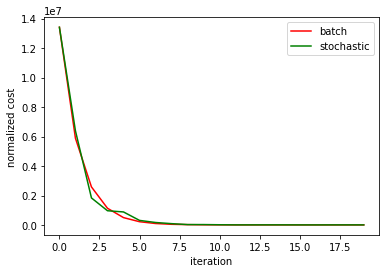

min cost with BGD: 12891.00843976068
min cost with SGD: 13339.528535811103


In [82]:
plt.figure()
plt.plot(np.arange(max_iter), cost_batch, 'r', label='batch')
plt.plot(np.arange(len(cost)), cost, 'g', label='stochastic')
plt.xlabel('iteration')
plt.ylabel('normalized cost')
plt.legend()
plt.show()
print(f'min cost with BGD: {np.min(cost_batch)}')
print(f'min cost with SGD: {np.min(cost)}')

# Conclusion
It appears that Batch Gradient descent works better for this dataset based on 100 iterations. Other considerations is that the dataset is very small so Batch gradient descent time bottleneck would not be apparent with this dataset but nevertheless scale poorly on large datasets.

### Few Iterations
We had just 100 which lessens the chance that we would get an ideal gradient using SGD since we choose at random on each step.

BGD excels at 100 iterations because the computational time while scaling poorly, is not apparent with this iteration size

### Convergence
because BGD uses all data to choose the improved weight function, it converged much more quickly than SGD in this case